## install and import all required packages

In [1]:
!pip install crepes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the data and split it into training and testing sets

### 3rd dataset

In [4]:
df_3 = pd.read_csv('drive/MyDrive/NASA_train.csv')
df_3.head()

,Unnamed: 0,engine,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow),RUL
0,0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,125
1,1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,125
2,2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,125
3,3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,125
4,4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,125


In [ ]:
len(df_3)

20631

In [67]:
train_3 = df_3[df_3["engine"]<=80]
calibration_3 = df_3[(df_3["engine"]>80)&(df_3["engine"]<=90)]
test_3 = df_3[df_3["engine"]>90]

In [68]:
X_train_3 = train_3[train_3.columns[2 : -1]]
y_train_3 = train_3["RUL"]

In [69]:
X_cali_3 = calibration_3[calibration_3.columns[2 : -1]]
y_cali_3 = calibration_3["RUL"]

In [70]:
X_test_3 = test_3[test_3.columns[2 : -1]]
y_test_3 = test_3["RUL"]

In [ ]:
X_test_3

,cycle,setting_1,setting_2,(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Bypass Ratio),(Bleed Enthalpy),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
18380,1,-0.0002,-0.0001,643.41,1587.82,1411.03,21.61,554.53,2388.08,9054.59,47.69,521.44,2388.11,8.4351,393,38.77,23.2860
18381,2,-0.0034,-0.0001,642.74,1584.56,1405.48,21.61,552.66,2388.15,9057.63,47.62,521.16,2388.09,8.4032,393,38.65,23.3206
18382,3,0.0011,0.0001,642.61,1593.05,1409.55,21.61,553.16,2388.13,9059.80,47.49,521.41,2388.18,8.4361,392,39.04,23.2637
18383,4,0.0011,0.0005,643.28,1594.84,1409.82,21.61,553.26,2388.12,9051.02,47.48,521.30,2388.11,8.4591,393,38.93,23.3402
18384,5,-0.0035,-0.0003,643.03,1593.76,1406.69,21.61,553.24,2388.15,9053.33,47.49,521.45,2388.15,8.4754,392,39.02,23.3241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735
20627,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594
20628,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333
20629,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640


## Models and conformal predictions

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

def random_forest(X_train, y_train, X_test):
  regr = RandomForestRegressor(max_depth=2, random_state=0, n_jobs = -1)
  model = regr.fit(X_train, y_train)

  return model

In [10]:
from sklearn.svm import SVR
def svr(X_train, y_train, X_test):
  svr = SVR(kernel="rbf", C=100, gamma=0.5, epsilon=0.01).fit(X_train, y_train)
  return svr


In [12]:
from crepes import ConformalRegressor, ConformalPredictiveSystem

from crepes.fillings import (sigma_variance, 
                             sigma_variance_oob,
                             sigma_knn,
                             binning)

In [42]:
def conformal_prediction_crepes(model, alpha, X_cali, y_cali, X_test):
  #Standard conformal regressors
  cr_std = ConformalRegressor()
  y_hat_cal = model.predict(X_cali)
  residuals_cal = y_cali - y_hat_cal
  cr_std.fit(residuals=residuals_cal)
  y_hat_test = model.predict(X_test)
  intervals = cr_std.predict(y_hat=y_hat_test, confidence=1-alpha)

  return y_hat_test, intervals

In [43]:
def conformal_prediction_crepes_mondrian(model, bin, X_cali, y_cali, X_test):
  #Standard conformal regressors
  cr_std = ConformalRegressor()
  y_hat_cal = model.predict(X_cali)
  residuals_cal = y_cali - y_hat_cal
  cr_std.fit(residuals=residuals_cal)
  y_hat_test = model.predict(X_test)

  #Normalized conformal regressors
  sigmas_cal_var = sigma_variance(X=X_cali, learner=model)
  cr_norm_var = ConformalRegressor()
  cr_norm_var.fit(residuals=residuals_cal, sigmas=sigmas_cal_var)
  sigmas_test_var = sigma_variance(X=X_test, learner=model)
  #Mondrian conformal regressors
  bins_cal, bin_thresholds = binning(values=sigmas_cal_var, bins=bin)
  cr_mond = ConformalRegressor()
  cr_mond.fit(residuals=residuals_cal, bins=bins_cal)
  bins_test = binning(values=sigmas_test_var, bins=bin_thresholds)
  intervals_mond = cr_mond.predict(y_hat=y_hat_test, bins=bins_test)

  return y_hat_test, intervals_mond

## Plotting functions

In [41]:
import matplotlib.pyplot as plt
def plot_with_cp(y_test, y_pred, y_pis, confidence):
  x = np.arange(1,len(y_pred)+1)

  plt.figure(figsize=(18,6))

  plt.plot(x,y_pred)
  plt.plot(x,y_test)

  #plt.plot(x[0:100],y_pis[:,0][0:100])
  #plt.plot(x[0:100],y_pis[:,1][0:100])

  plt.fill_between(x, y_pis[:,0].flatten(), y_pis[:,1].flatten(), alpha=0.2, color='tab:green')

  plt.xlabel('test set')
  plt.ylabel('RUL')
  plt.title('Predictive maintenance RUL with confidence of ' + confidence +'%')
  plt.legend(["prediction","true",confidence + "% confidence interval"])
  plt.grid(True)
  plt.show()

## Random forest

### 3rd dataset

In [11]:
rf_model_3 = random_forest(X_train_3, y_train_3, X_test_3)

In [44]:
y_pred_rf_3, y_pis_rf_3 = conformal_prediction_crepes(rf_model_3, 0.1, X_cali_3, y_cali_3, X_test_3)

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test_3, y_pred_rf_3)

0.5461379392744709

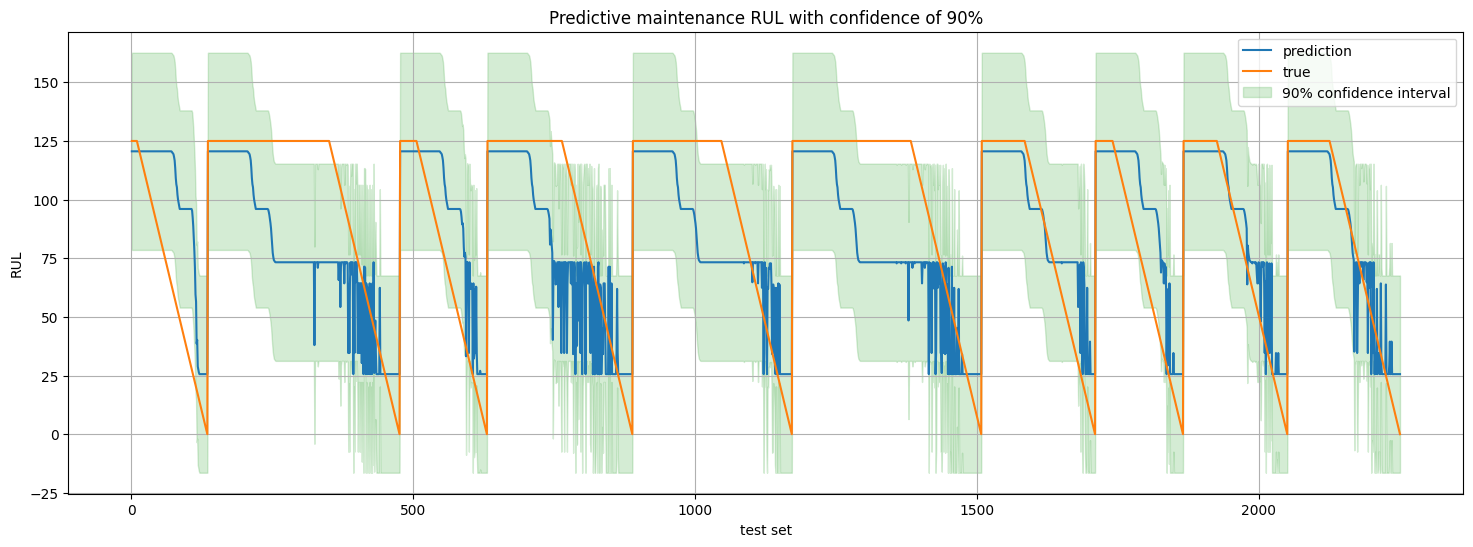

In [46]:
plot_with_cp(y_test_3, y_pred_rf_3, y_pis_rf_3, "90")

In [ ]:
y_pred_rf_3_mondrian, y_pis_rf_3_mondrian = conformal_prediction_crepes_mondrian(rf_model_3, 20, X_cali_3, y_cali_3, X_test_3)

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test_3, y_pred_rf_3_mondrian)

0.5461379392744707

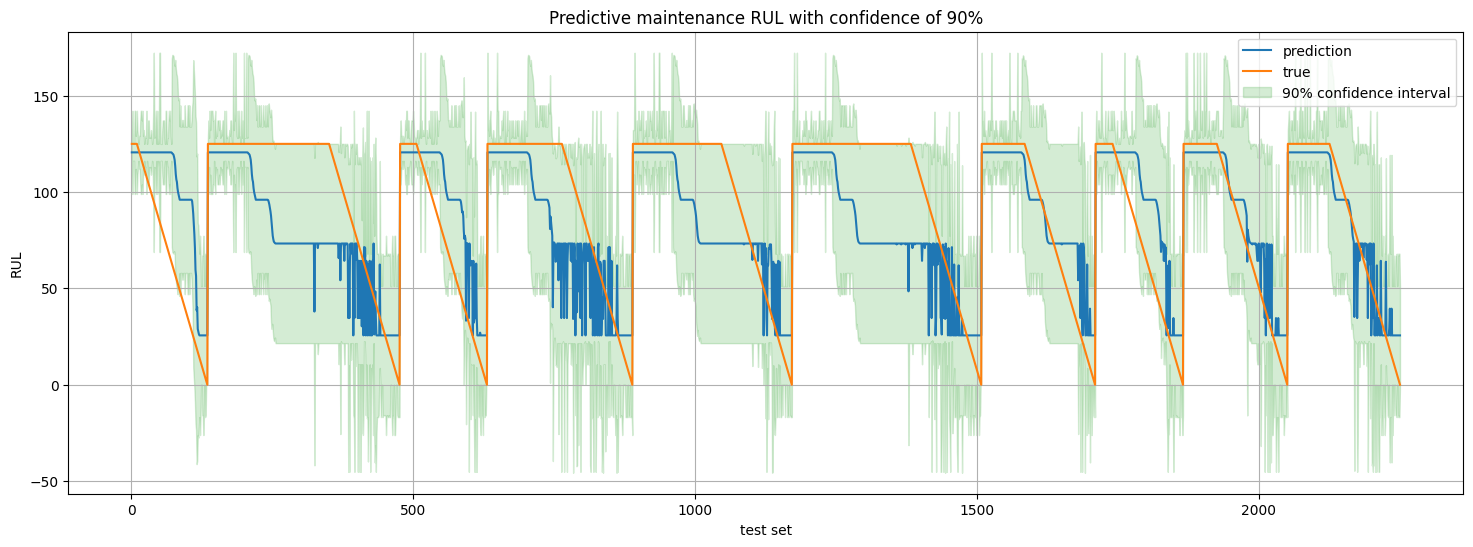

In [51]:
plot_with_cp(y_test_3, y_pred_rf_3_mondrian, y_pis_rf_3_mondrian, "90")

## SVR

### 3rd dataset

In [52]:
columns = X_train_3.columns

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaler = sc.fit(X_train_3)
X_train_3 = scaler.transform(X_train_3)
X_cali_3 = scaler.transform(X_cali_3)
X_test_3 = scaler.transform(X_test_3)

In [54]:
X_train_3= pd.DataFrame(X_train_3, columns=columns)
X_test_3= pd.DataFrame(X_test_3, columns=columns)

In [55]:
svr_model_3 = svr(X_train_3, y_train_3, X_test_3)

In [56]:
y_pred_svr_3, y_pis_svr_3 = conformal_prediction_crepes(svr_model_3,0.1, X_cali_3, y_cali_3, X_test_3)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [57]:
from sklearn.metrics import r2_score
r2_score(y_test_3, y_pred_svr_3)

0.6808095816549272

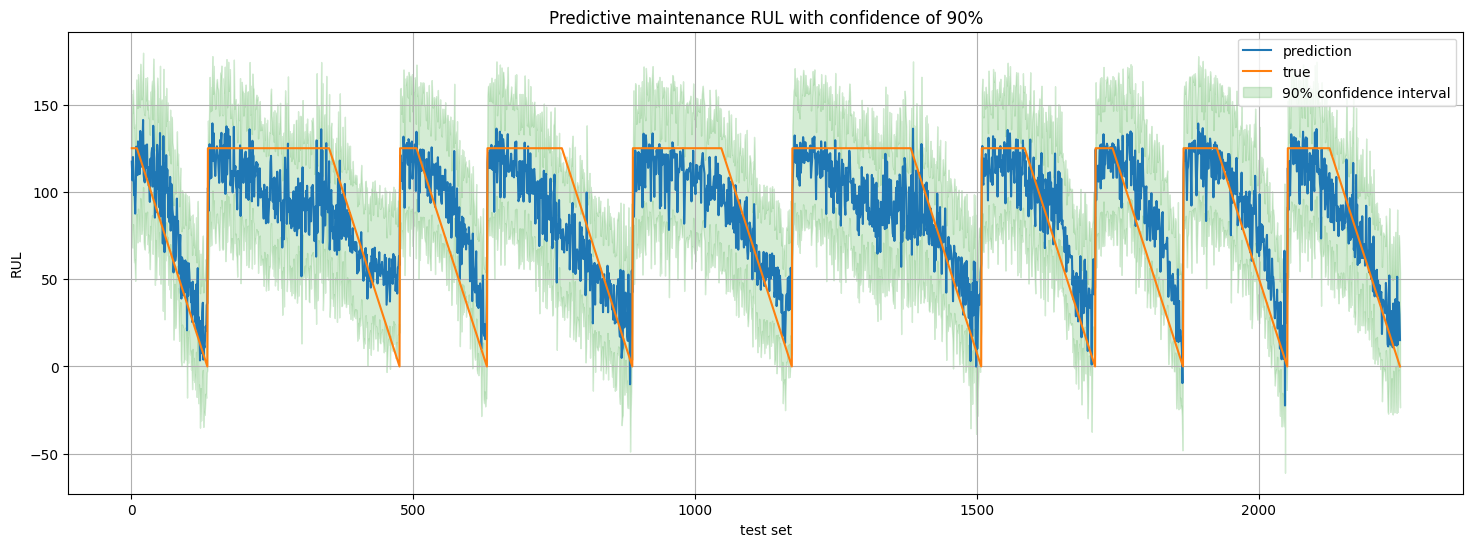

In [58]:
plot_with_cp(y_test_3, y_pred_svr_3, y_pis_svr_3, "90")

In [72]:
sigmas_cal_var = sigma_variance(X=X_cali_3, learner=svr_model_3)
cr_norm_var = ConformalRegressor()
cr_norm_var.fit(residuals=residuals_cal, sigmas=sigmas_cal_var)
sigmas_test_var = sigma_variance(X=X_test_3, learner=svr_model_3)



ValueError: ignored